# Análisis de Encuesta

Este notebook contiene el análisis de las respuestas obtenidas del formulario.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('viridis')

# Cargar los datos
file_path = 'Respuestas.xlsx'
sheet_name = 'Respuestas de formulario 1'
df = pd.read_excel(file_path, sheet_name=sheet_name)


## Sección 1
### Problema 1: Clasificación por género

In [32]:

# Clasificar respuestas por género
genero_counts = df['Genero'].value_counts()
genero_porcentaje = (genero_counts / genero_counts.sum()) * 100

# Mostrar resultados
print("Frecuencia por género:")
print(genero_counts)
print("\nPorcentajes por género:")
print(genero_porcentaje)


Frecuencia por género:
Genero
Hombre    22
Mujer      8
Name: count, dtype: int64

Porcentajes por género:
Genero
Hombre    73.333333
Mujer     26.666667
Name: count, dtype: float64


### Problema 2: Tabla de frecuencias agrupadas para edades

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
ruta_excel = 'Respuestas.xlsx'  # Cambia esta ruta si el archivo no está en el mismo directorio
datos = pd.read_excel(ruta_excel)

# Filtrar solo la columna de edad
edades = datos["Edad"]

# Crear intervalos de clase con una amplitud de 5 años
rango_min = edades.min()
rango_max = edades.max()
amplitud = 5

intervalos = pd.interval_range(
    start=rango_min - (rango_min % amplitud), 
    end=rango_max + amplitud, 
    freq=amplitud, 
    closed='left'
)

# Calcular frecuencias
frecuencias = pd.cut(edades, bins=intervalos).value_counts(sort=False)

# Obtener límites e información
limites_inferiores = [interval.left for interval in frecuencias.index.categories]
limites_superiores = [interval.right for interval in frecuencias.index.categories]
puntos_medios = [(li + ls) / 2 for li, ls in zip(limites_inferiores, limites_superiores)]
frecuencia_absoluta = frecuencias.values
frecuencia_relativa = frecuencia_absoluta / sum(frecuencia_absoluta)
porcentajes = frecuencia_relativa * 100

# Crear la tabla
tabla_frecuencias = pd.DataFrame({
    "LI (Límite Inferior)": limites_inferiores,
    "LS (Límite Superior)": limites_superiores,
    "xi (Punto Medio)": puntos_medios,
    "Frecuencia Absoluta": frecuencia_absoluta,
    "Frecuencia Relativa": frecuencia_relativa.round(2),
    "%": porcentajes.round(1)
})

# Agregar totales
fila_total = {
    "LI (Límite Inferior)": "Total",
    "LS (Límite Superior)": "",
    "xi (Punto Medio)": "",
    "Frecuencia Absoluta": sum(frecuencia_absoluta),
    "Frecuencia Relativa": sum(frecuencia_relativa).round(2),
    "%": porcentajes.sum().round(1)
}
tabla_frecuencias = pd.concat([tabla_frecuencias, pd.DataFrame([fila_total])], ignore_index=True)

# Mostrar la tabla con estilo Excel
tabla_frecuencias.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody tr', 'props': [('text-align', 'center')]}
]).set_caption("Tabla de Frecuencias")


,LI (Límite Inferior),LS (Límite Superior),xi (Punto Medio),Frecuencia Absoluta,Frecuencia Relativa,%
0,15,20,17.500000,5,0.170000,16.700000
1,20,25,22.500000,13,0.430000,43.300000
2,25,30,27.500000,7,0.230000,23.300000
3,30,35,32.500000,3,0.100000,10.000000
4,35,40,37.500000,1,0.030000,3.300000
5,40,45,42.500000,1,0.030000,3.300000
6,Total,,,30,1.000000,100.000000


## Sección 2
### Problema 1: Gráfico circular sobre aplicaciones de Blockchain

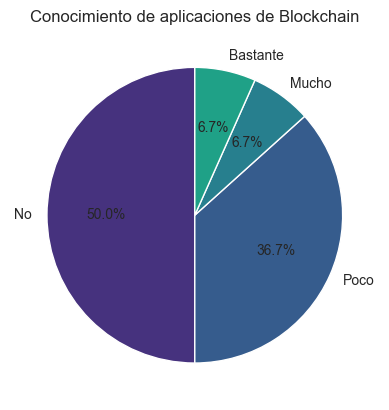

In [ ]:


# Gráfico circular para '¿Conoces las aplicaciones de Blockchain?'
respuestas = df['¿Conoces las aplicaciones de Blockchain en sistemas computacionales? '].value_counts()
respuestas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Conocimiento de aplicaciones de Blockchain")
plt.ylabel("")
plt.show()


### Problema 2: Media, mediana y moda de las edades

In [ ]:

# Calcular medidas de tendencia central
media_edad = df['Edad'].mean()
mediana_edad = df['Edad'].median()
moda_edad = df['Edad'].mode()[0]

# Mostrar resultados
print(f"Media: {media_edad:.2f}")
print(f"Mediana: {mediana_edad}")
print(f"Moda: {moda_edad}")


Media: 24.37
Mediana: 22.0
Moda: 20


## Sección 3
### Problema 1: Desviación estándar de las edades

In [ ]:
# Calcular desviación estándar
desviacion_edad = df['Edad'].std().round(3)
print(f"Desviación estándar: {desviacion_edad}")


Desviación estándar: 5.72


### Problema 2: Rango de edades

In [ ]:

# Calcular rango
rango_edad = df['Edad'].max() - df['Edad'].min()
print(f"Rango de edades: {rango_edad}")


Rango de edades: 23


## Sección 4
### Problema 1: Coeficiente de asimetría de las edades

In [ ]:
# Calcular asimetría
asimetria = df['Edad'].skew()
print(f"Asimetría: {asimetria:.2f}")


Asimetría: 1.31


### Problema 2: Coeficiente de curtosis de las edades

In [ ]:
# Calcular curtosis
curtosis = df['Edad'].kurtosis()
print(f"Curtosis: {curtosis:.2f}")


Curtosis: 1.65


### Problema 3: Varianza en respuestas de actualización tecnológica

In [ ]:
# Mapear valores de texto a valores numéricos
df['Actualizacion_Numerica'] = df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '].map(actualizacion_mapping)

# Calcular varianza
varianza_actualizacion = df['Actualizacion_Numerica'].var()
print(f"Varianza: {varianza_actualizacion:.3f}")


Varianza: 0.190
